In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Any results you write to the current directory are saved as output.

In [20]:
data = pd.read_csv('ex2data1.csv')
data.head()

,x,y,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [21]:
# extracting the variables
X = data.iloc[:,0:2]
Y = data.iloc[:,2]

In [22]:
# preprocessing
# introducting intercept column
ones = np.ones((len(data),1))
X = np.concatenate((ones,X),axis=1)
n,m = np.shape(X)
Y = np.array(Y).reshape(n,1)

np.shape(X), np.shape(Y)

((100, 3), (100, 1))

**1.1 Visualization**

Text(0,0.5,'exam2')

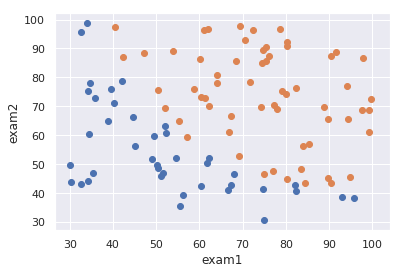

In [23]:
data0 = data[data['label']==0]
data1 = data[data['label']==1]

plt.scatter(data0['x'],data0['y'])
plt.scatter(data1['x'],data1['y'])
plt.xlabel('exam1')
plt.ylabel('exam2')

**1.2 Sigmoid Function**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtTw15SDJGnftUix9gEl_DOjW45ulN_sYsiHixO6iC54z32dyr)

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

**2.1.3 Cost function**
![](https://i.stack.imgur.com/XbU4S.png)

In [25]:
theta = np.zeros(shape=(m,1))
def error(theta,x,y):
    h1 = y.T@np.log(sigmoid(x@theta)) + (1-y).T@np.log(1-sigmoid(x@theta))
    return -(1/n)*h1
error(theta,X,Y)

array([[0.69314718]])

**1.4 Gradient Descent**
![](https://i.stack.imgur.com/89edQ.png)

In [26]:
def gradient_descent(theta,X,y):
    return (1/n)*(X.T@(sigmoid(X@theta)-y))
gradient_descent(theta,X,Y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

**1.5 Optimization of the function using truncated Newton algorithm**

We will use scipy library to optimize the function and learn the best parameters for the given data.

In [27]:
from scipy.optimize import fmin_tnc
temp = fmin_tnc(func = error, x0 = theta.flatten(),fprime = gradient_descent, args = (X, Y.flatten()))
theta_fit = temp[0]
theta_fit

array([-25.16131865,   0.20623159,   0.20147149])

we can check the error for this parameter which was initially at **0.693**

In [28]:
error(theta_fit,X,Y)

array([0.2034977])

In [29]:
# prediction
X_i = np.array([1,60,60])
sigmoid(X_i@theta_fit)

0.3320042289469506

for student with 60 marks in each exam, the model predicts that the student has 33% probability chance

**1.6 Visualizing the data with separation boundary**

In [30]:
# for plotting purpose we will convert the probability value to int
def convert_value(p):
    if p<=0.5:
        return 0
    else:
        return 1
X_i = np.array([1,90,90])
pi = sigmoid(X_i@theta_fit)
convert_value(pi)

1

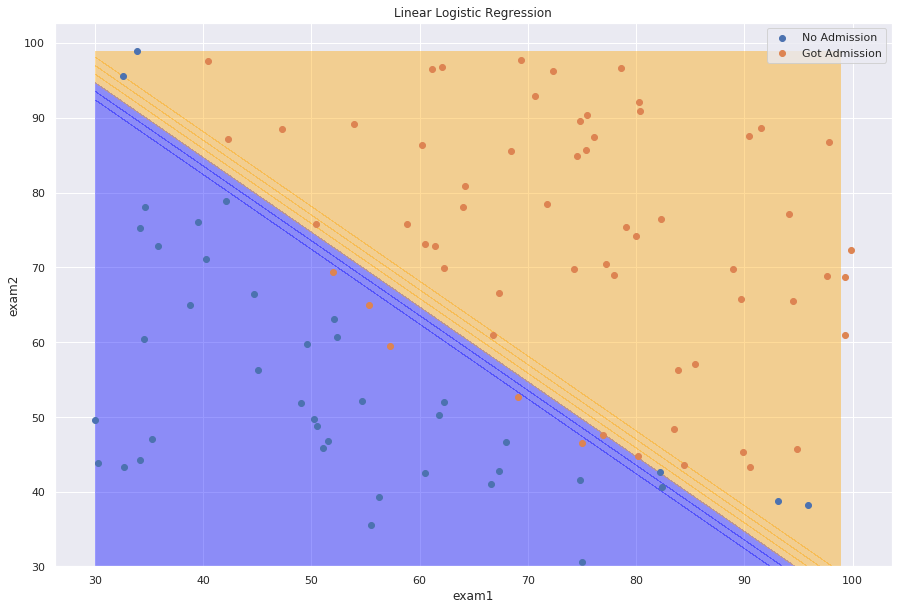

In [31]:
xs = np.linspace(min(data['x']),max(data['y']),num=10)
ys = np.linspace(min(data['x']),max(data['y']),num=10)

X_grid,Y_grid = np.meshgrid(xs,ys)
Z_grid = np.zeros(shape=(len(ys),len(xs)))
for i in range(len(xs)):
    for j in range(len(ys)):
        value = np.array([1,xs[i],ys[j]])@theta_fit
        Z_grid[j,i] = convert_value(value)
        
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(15,10))
plt.contourf(X_grid,Y_grid,Z_grid,cmap=ListedColormap(('blue','orange')),alpha=0.4)
plt.scatter(data0['x'],data0['y'],label='No Admission')
plt.scatter(data1['x'],data1['y'],label='Got Admission')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.title('Linear Logistic Regression')
plt.legend()

**1.7 Evaluation of the model based on accuracy**

In [32]:
prediction = X@theta_fit
y_pred = []
for pred in prediction:
    y_pred.append(convert_value(pred))
y_pred = np.array(y_pred).reshape(-1,1)
correct = np.sum(Y==y_pred)
accuracy = correct/len(Y)*100
print('accuracy is %.2f%%' % accuracy)

accuracy is 89.00%
